# New York

Nueva York es un estado altamente poblado en el noreste de Estados Unidos. Además es uno de los destinos turísticos más populares.

## Análisis Exploratorio de los Datos (EDA)

In [1]:
#importacion de librerías
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remueve los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cambiar el directorio de trabajo al directorio donde se encuentran los archivos JSON
%cd .\new_york_data

# Obtener una lista de archivos en el directorio actual
archivos = os.listdir()

# Crear un DataFrame vacío para almacenar los datos
df_New_York = pd.DataFrame()

# Iterar sobre cada archivo en la lista de archivos
for archivo in archivos:
    # Verificar si el archivo tiene la extensión .json
    if archivo.endswith('.json'):
        # Imprimir un mensaje indicando que se está cargando el archivo actual
        print('Cargando data ', archivo, '...')
        # Leer el archivo JSON y cargarlo en un DataFrame
        data = pd.read_json(archivo, lines=True)
        # Concatenar los datos del archivo al DataFrame principal
        df_New_York = pd.concat([df_New_York, data], axis=0)

c:\Users\sebas\OneDrive\Escritorio\Proyecto-Grupal-Google-yelp\Sprint 1 Propuesta de Trabajo\EDA Google\new_york_data
Cargando data  1.json ...
Cargando data  10.json ...
Cargando data  11.json ...
Cargando data  12.json ...
Cargando data  13.json ...
Cargando data  14.json ...
Cargando data  15.json ...
Cargando data  16.json ...
Cargando data  17.json ...
Cargando data  18.json ...
Cargando data  2.json ...
Cargando data  3.json ...
Cargando data  4.json ...
Cargando data  5.json ...
Cargando data  6.json ...
Cargando data  7.json ...
Cargando data  8.json ...
Cargando data  9.json ...


In [3]:
df_New_York.head()

NameError: name 'df_New_York' is not defined

In [9]:
#Tamaño del dataframe
df_New_York.shape

(2700000, 8)

In [10]:
#Visualizar el tipo de dato de cada 
df_New_York.dtypes

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object

In [11]:
#Transformar la columna Time a tipo Date
df_New_York['time']=pd.to_datetime(df_New_York['time'],unit='ms') #.dt.strftime('%d/%m/%y %H:%M:%S')


In [12]:
df_New_York.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,2020-10-23 23:13:15.361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,2021-05-04 19:37:17.403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,2020-08-14 19:01:02.039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [13]:
#Eliminar Columna Pics y Resp
df_New_York=df_New_York.drop(['pics','resp'],axis=1)


In [14]:
#Valores Nulos
df_New_York.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1163593
gmap_id          0
dtype: int64

In [15]:
#Cantidad de usuarios únicos
len(df_New_York['user_id'].unique())

567559

In [16]:
#Eliminar duplicados
df_New_York.drop_duplicates(subset='user_id',inplace=True)

In [17]:
#Comprobar el tamaño del dataframe
df_New_York.shape

(567559, 6)

### Visualizacion de datos

#### 1. Distribución de Ratings

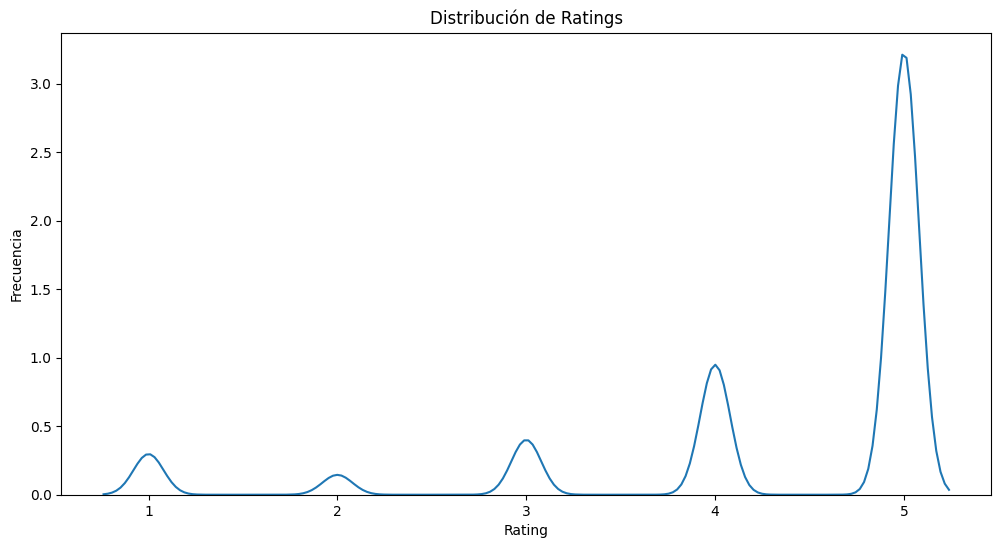

In [21]:
plt.figure(figsize=(12,6))
sns.kdeplot(df_New_York['rating']) # bins=20, color = "#6A5ACD",kde=True)
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

- Se observa que hay mayor frecuencia de comentarios con calificación **5**, lo cual puede indicar mayor satisfacción de los usuarios

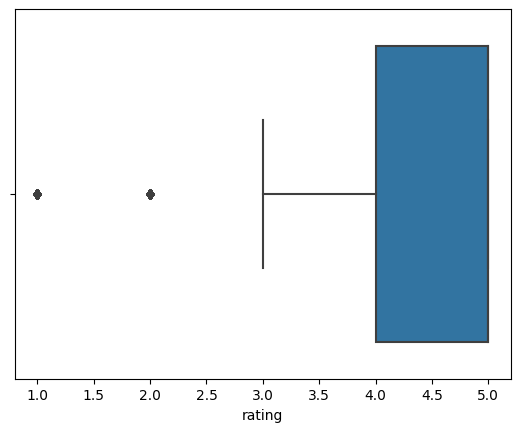

In [42]:
#valores atípicos
sns.boxplot(x = 'rating', data = df_New_York)
plt.show()

#### 2. Distribución de Comentarios en el tiempo (Año, Mes Día y Hora)

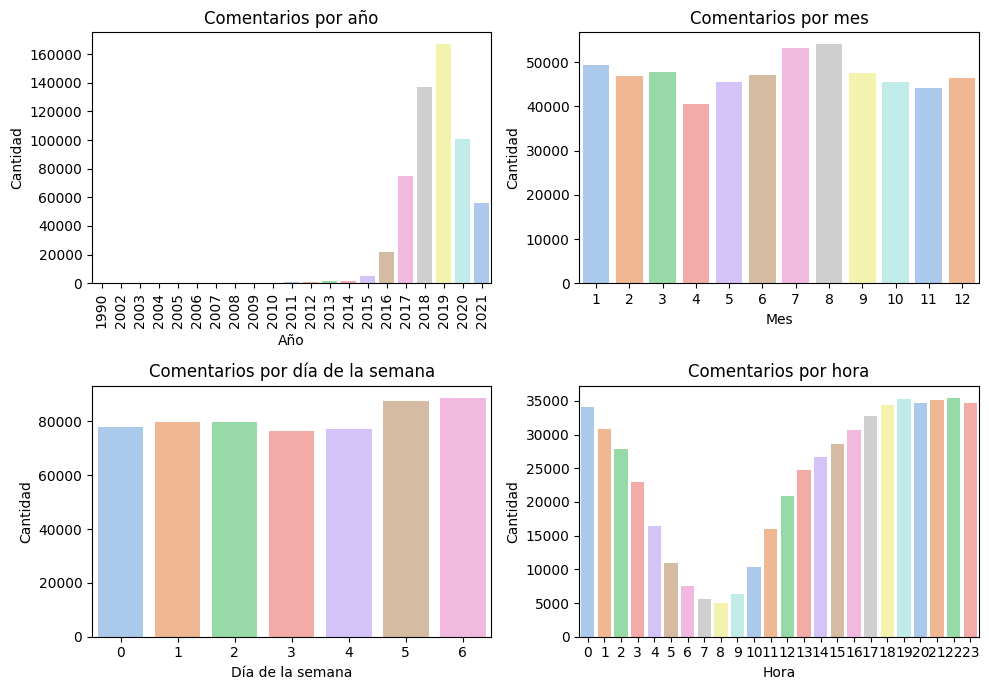

In [19]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS Comentarios

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 1)
sns.countplot(x=df_New_York['time'].dt.year, palette='pastel')
plt.title('Comentarios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Subplot 2: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 2)
sns.countplot(x=df_New_York['time'].dt.month , palette='pastel')
plt.title('Comentarios por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para los días de la semana de la columna HORA
plt.subplot(2, 2, 3)
sns.countplot(x=df_New_York['time'].dt.dayofweek, palette='pastel')
plt.title('Comentarios por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para las horas de la columna FECHA
plt.subplot(2, 2, 4)
sns.countplot(x=df_New_York['time'].dt.hour, palette='pastel')
plt.title('Comentarios por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Subplot 1:** La mayor cantidad de comentarios por año fue en el 2019

**Subplot 2:** La mayor cantidad de comentarios por mes fue en Agosto

**Subplot 3:** La mayor cantidad de comentarios por día fue el Sábado (6)

**Subplot 4:** La mayor cantidad de comentarios por hora fue durante la noche, entre las 19 y 24hrs

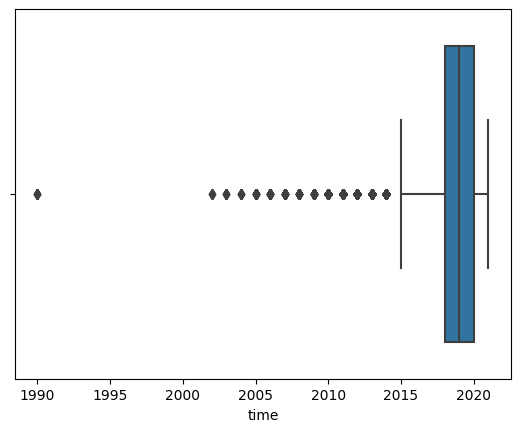

In [45]:
#Valores atípicos Subplot 1
sns.boxplot( x=df_New_York['time'].dt.year, data = df_New_York)
plt.show()

Se observa que la mayor cantidad de comentarios se encuentran en el año 2019, existen datos también en los años anteriores hasta el 2002 y hay un único dato en el año 1990, habiendo un vacio (ausencia de datos) entre el periodo de 1991 hasta 2001.

### 3. Usuarios

In [27]:
#Cantidad de usuarios únicos
cant_user = len(df_New_York['user_id'].unique())
cant_user

567559

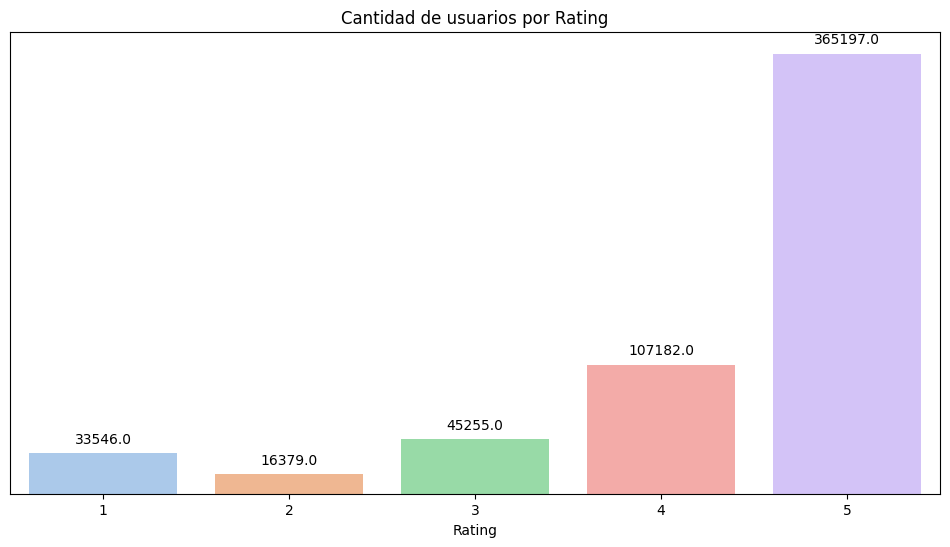

In [40]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x=df_New_York['rating'], palette='pastel')
# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,
    p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
ax.get_yaxis().set_visible(False)

plt.title("Cantidad de usuarios por Rating")
plt.xlabel("Rating")
# plt.ylabel("Cantidad de Usuarios")
plt.show()

- Se observa que hay **365197** usuarios que dieron una calificación de 5, siendo esta la mayor cantidad; mientras **16379** usuarios dieron una calificación de 2, la cual es la calificación con menor cantidad de usuarios.